In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
from plotnine import *
import re
import folium

In [8]:
park = pd.read_csv("./data/전국도시공원정보표준데이터.csv", encoding='euc-kr')

In [9]:
park.head()

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명
0,27140-00069,율하체육공원,체육공원,NaN,대구광역시 동구 율하동 1626,35.859925,128.692838,187515.0,NaN,NaN,NaN,NaN,NaN,2003-12-24,대구광역시 동구청,053-662-2860,2021-09-01,6270000,대구광역시
1,27260-00037,대구체육공원,체육공원,대구광역시 수성구 유니버시아드로 180,대구광역시 수성구 대흥동 산35,35.829768,128.690164,1288164.0,"대구스타디움, 육상진흥센터",NaN,"주차장, 매점",NaN,스포츠기념관,1996-05-11,대구광역시 수성구청,053-666-2850,2021-09-01,6270000,대구광역시
2,27290-00175,월배체육공원,체육공원,NaN,대구광역시 달서구 도원동 1473,35.801600,128.536496,36061.0,NaN,NaN,NaN,NaN,NaN,2009-12-04,대구광역시 달서구청,053-667-2850,2021-09-01,6270000,대구광역시
3,27710-00058,명곡체육공원,체육공원,대구광역시 달성군 화원읍 인흥1길 12,대구광역시 달성군 화원읍 명곡리 55,35.797690,128.503601,492000.0,인라인롤러 경기장,NaN,NaN,NaN,NaN,2008-04-10,대구광역시 달성군청,053-668-2850,2021-09-01,6270000,대구광역시
4,27710-00059,국가산단체육1공원,체육공원,NaN,대구광역시 달성군 구지면 내리 산106,35.798009,128.503878,28162.0,NaN,NaN,NaN,NaN,NaN,2009-09-30,대구광역시 달성군청,053-668-2850,2021-09-01,6270000,대구광역시


In [10]:
# 불필요한 컬럼 제거하기
park.columns

Index(['관리번호', '공원명', '공원구분', '소재지도로명주소', '소재지지번주소', '위도', '경도', '공원면적',
       '공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)', '공원보유시설(교양시설)',
       '공원보유시설(기타시설)', '지정고시일', '관리기관명', '전화번호', '데이터기준일자', '제공기관코드', '제공기관명'],
      dtype='object')

In [12]:
park.drop(columns=['공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)', '공원보유시설(교양시설)',
       '공원보유시설(기타시설)', '지정고시일', '관리기관명'], inplace=True)

In [13]:
park.columns

Index(['관리번호', '공원명', '공원구분', '소재지도로명주소', '소재지지번주소', '위도', '경도', '공원면적',
       '전화번호', '데이터기준일자', '제공기관코드', '제공기관명'],
      dtype='object')

In [15]:
park.head(10)

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,전화번호,데이터기준일자,제공기관코드,제공기관명
0,27140-00069,율하체육공원,체육공원,NaN,대구광역시 동구 율하동 1626,35.859925,128.692838,187515.0,053-662-2860,2021-09-01,6270000,대구광역시
1,27260-00037,대구체육공원,체육공원,대구광역시 수성구 유니버시아드로 180,대구광역시 수성구 대흥동 산35,35.829768,128.690164,1288164.0,053-666-2850,2021-09-01,6270000,대구광역시
2,27290-00175,월배체육공원,체육공원,NaN,대구광역시 달서구 도원동 1473,35.801600,128.536496,36061.0,053-667-2850,2021-09-01,6270000,대구광역시
3,27710-00058,명곡체육공원,체육공원,대구광역시 달성군 화원읍 인흥1길 12,대구광역시 달성군 화원읍 명곡리 55,35.797690,128.503601,492000.0,053-668-2850,2021-09-01,6270000,대구광역시
4,27710-00059,국가산단체육1공원,체육공원,NaN,대구광역시 달성군 구지면 내리 산106,35.798009,128.503878,28162.0,053-668-2850,2021-09-01,6270000,대구광역시
5,27710-00061,서재체육공원,체육공원,NaN,대구광역시 달성군 다사읍 방천리 212,35.884252,128.503869,31204.0,053-668-2850,2021-09-01,6270000,대구광역시
6,27230-00087,연경체육공원,체육공원,NaN,대구광역시 북구 연경동 820,35.943972,128.625649,7279.0,053-665-2864,2021-09-01,6270000,대구광역시
7,48870-00001,상림근린공원,근린공원,NaN,경상남도 함양군 함양읍 운림리 349-1,35.524331,127.718967,472900.0,NaN,2021-09-24,5460000,경상남도 함양군
8,48870-00004,하림공원,근린공원,NaN,경상남도 함양군 함양읍 용평리 66-2,35.511968,127.743278,112500.0,NaN,2021-09-24,5460000,경상남도 함양군
9,48870-00002,충혼탑어린이공원,어린이공원,NaN,경상남도 함양군 함양읍 백연리 106-2,35.514948,127.726059,4600.0,NaN,2021-09-24,5460000,경상남도 함양군


In [16]:
park.shape

(18092, 12)

# 위도 경도 시각화

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


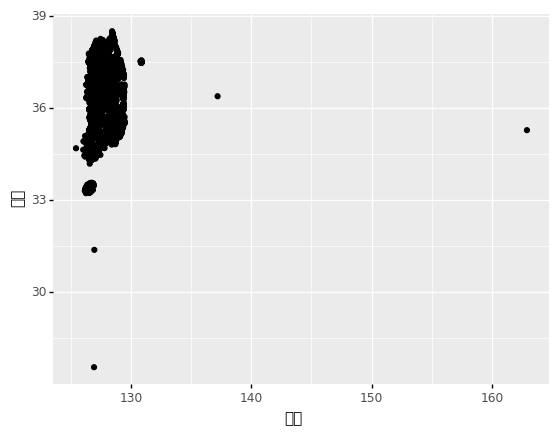

<ggplot: (702565876)>

In [17]:
# 지도를 출력해 보니 특정 지역만 있습니다.
# 결측치인 nan 데이터 때문에 다른 데이터가 제대로 보이지 않습니다.
# nan 데이터를 제거하고 다시 그려봅니다.
(ggplot(park)
 + aes(x='경도', y='위도')
 + geom_point()
 + theme(text=element_text(family='NanumBarunGothic'))
)

In [18]:
park.dtypes

관리번호         object
공원명          object
공원구분         object
소재지도로명주소     object
소재지지번주소      object
위도          float64
경도          float64
공원면적        float64
전화번호         object
데이터기준일자      object
제공기관코드       object
제공기관명        object
dtype: object

# 데이터 전처리

- 아웃라이어 데이터 제거 혹은 대체

In [20]:
# park["공원면적"] = park["공원면적"].str.replace(",", '').astype(float)
# park["공원면적"].head()

In [21]:
# 도로명 주소의 널값 수
park['소재지도로명주소'].isnull().sum()

12261

In [22]:
# 지번 주소의 널값 수
park['소재지지번주소'].isnull().sum()

779

In [23]:
park.loc[(park['소재지도로명주소'].isnull()) & (park['소재지지번주소'].notnull())].shape

(12261, 12)

In [25]:
park['공원면적비율'] = park['공원면적'].apply(lambda x : np.sqrt(x)*0.01)
park['공원면적비율'].head(10)

0     4.330300
1    11.349731
2     1.898973
3     7.014271
4     1.678154
5     1.766465
6     0.853171
7     6.876772
8     3.354102
9     0.678233
Name: 공원면적비율, dtype: float64

In [26]:
park['소재지도로명주소'].fillna(park['소재지지번주소'], inplace=True)

In [27]:
park['소재지도로명주소'].isnull().sum()

0

In [29]:
park['시도'] = park['소재지도로명주소'].str.split(' ', expand=True)[0]
park.head(3)

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,전화번호,데이터기준일자,제공기관코드,제공기관명,공원면적비율,시도
0,27140-00069,율하체육공원,체육공원,대구광역시 동구 율하동 1626,대구광역시 동구 율하동 1626,35.859925,128.692838,187515.0,053-662-2860,2021-09-01,6270000,대구광역시,4.330300,대구광역시
1,27260-00037,대구체육공원,체육공원,대구광역시 수성구 유니버시아드로 180,대구광역시 수성구 대흥동 산35,35.829768,128.690164,1288164.0,053-666-2850,2021-09-01,6270000,대구광역시,11.349731,대구광역시
2,27290-00175,월배체육공원,체육공원,대구광역시 달서구 도원동 1473,대구광역시 달서구 도원동 1473,35.801600,128.536496,36061.0,053-667-2850,2021-09-01,6270000,대구광역시,1.898973,대구광역시


In [30]:
park['구군'] = park['소재지도로명주소'].str.split(' ', expand=True)[1]
park.head(3)

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,전화번호,데이터기준일자,제공기관코드,제공기관명,공원면적비율,시도,구군
0,27140-00069,율하체육공원,체육공원,대구광역시 동구 율하동 1626,대구광역시 동구 율하동 1626,35.859925,128.692838,187515.0,053-662-2860,2021-09-01,6270000,대구광역시,4.330300,대구광역시,동구
1,27260-00037,대구체육공원,체육공원,대구광역시 수성구 유니버시아드로 180,대구광역시 수성구 대흥동 산35,35.829768,128.690164,1288164.0,053-666-2850,2021-09-01,6270000,대구광역시,11.349731,대구광역시,수성구
2,27290-00175,월배체육공원,체육공원,대구광역시 달서구 도원동 1473,대구광역시 달서구 도원동 1473,35.801600,128.536496,36061.0,053-667-2850,2021-09-01,6270000,대구광역시,1.898973,대구광역시,달서구


In [31]:
park.describe()

,위도,경도,공원면적,공원면적비율
count,17579.000000,17566.000000,1.809200e+04,18092.000000
mean,36.422124,127.492447,3.469674e+04,1.001839
std,1.062496,0.895521,2.201911e+05,1.570391
min,27.551606,125.432215,0.000000e+00,0.000000
25%,35.442194,126.887900,1.503100e+03,0.387698
50%,36.574823,127.112195,2.231000e+03,0.472335
75%,37.439970,128.061276,1.039767e+04,1.019690
max,38.491555,162.920004,9.320660e+06,30.529756


In [32]:
park_loc_notnull = park.loc[(park['위도'] > 32 ) & (124 < park['경도']) &(park['경도'] < 132) & park['시도'].notnull()]
park_loc_notnull

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,전화번호,데이터기준일자,제공기관코드,제공기관명,공원면적비율,시도,구군
0,27140-00069,율하체육공원,체육공원,대구광역시 동구 율하동 1626,대구광역시 동구 율하동 1626,35.859925,128.692838,187515.0,053-662-2860,2021-09-01,6270000,대구광역시,4.330300,대구광역시,동구
1,27260-00037,대구체육공원,체육공원,대구광역시 수성구 유니버시아드로 180,대구광역시 수성구 대흥동 산35,35.829768,128.690164,1288164.0,053-666-2850,2021-09-01,6270000,대구광역시,11.349731,대구광역시,수성구
2,27290-00175,월배체육공원,체육공원,대구광역시 달서구 도원동 1473,대구광역시 달서구 도원동 1473,35.801600,128.536496,36061.0,053-667-2850,2021-09-01,6270000,대구광역시,1.898973,대구광역시,달서구
3,27710-00058,명곡체육공원,체육공원,대구광역시 달성군 화원읍 인흥1길 12,대구광역시 달성군 화원읍 명곡리 55,35.797690,128.503601,492000.0,053-668-2850,2021-09-01,6270000,대구광역시,7.014271,대구광역시,달성군
4,27710-00059,국가산단체육1공원,체육공원,대구광역시 달성군 구지면 내리 산106,대구광역시 달성군 구지면 내리 산106,35.798009,128.503878,28162.0,053-668-2850,2021-09-01,6270000,대구광역시,1.678154,대구광역시,달성군
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18087,46230-00034,교통광장,기타,전라남도 광양시 광양읍 인동리 375-2,전라남도 광양시 광양읍 인동리 375-2,34.974555,127.588884,676.0,061-797-2512,2021-09-28,4840000,전라남도 광양시,0.260000,전라남도,광양시
18088,46230-00035,백학광장,기타,전라남도 광양시 진상면 비평리 353,전라남도 광양시 진상면 비평리 353,35.044871,127.720569,18026.0,061-797-2512,2021-09-28,4840000,전라남도 광양시,1.342609,전라남도,광양시
18089,46230-00036,소공원,기타,전라남도 광양시 광양읍 목성리 737,전라남도 광양시 광양읍 목성리 737,34.974071,127.591474,405.0,061-797-2512,2021-09-28,4840000,전라남도 광양시,0.201246,전라남도,광양시
18090,46230-00037,장동폐도부지체육공원,기타,전라남도 광양시 옥곡면 신금리 917-1,전라남도 광양시 옥곡면 신금리 917-1,34.984496,127.708576,21790.0,061-797-2512,2021-09-28,4840000,전라남도 광양시,1.476144,전라남도,광양시


In [33]:
park.loc[(park['위도'] < 26) | (park['경도']>= 132)]

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,전화번호,데이터기준일자,제공기관코드,제공기관명,공원면적비율,시도,구군
387,46710-00112,공원-112,소공원,전라남도 담양군 대전면 성산리 434-13,전라남도 담양군 대전면 성산리 434-13,35.269633,162.920004,743.0,061-380-3118,2020-12-14,4850000,전라남도 담양군,0.272580,전라남도,담양군
3055,43113-00080,근린공원5(만수공원),근린공원,충청북도 청주시 흥덕구 오송읍 만수리 512,충청북도 청주시 흥덕구 오송읍 만수리 512,36.374204,137.202661,33258.0,043-201-4433,2020-07-16,5710000,충청북도 청주시,1.823678,충청북도,청주시


In [34]:
park_loc_notnull['시도'].value_counts()

경기도         4007
서울특별시       1676
전라남도        1548
충청남도        1145
경상남도        1069
            ... 
우이천로           1
중계로12길         1
중계로14라길        1
한글비석로39길       1
상계             1
Name: 시도, Length: 72, dtype: int64

SyntaxError: invalid syntax (739744537.py, line 8)

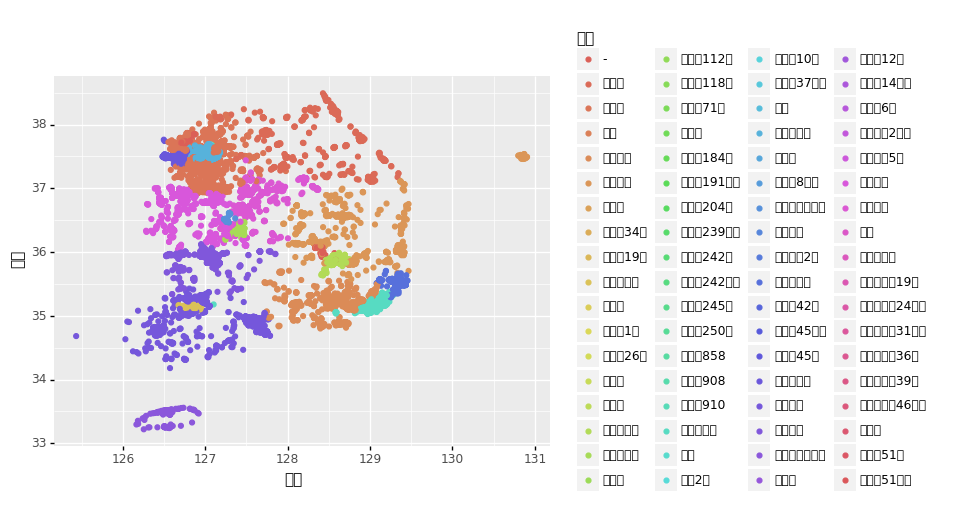

<ggplot: (705399197)>

In [39]:
(ggplot(park_loc_notnull)
 + aes(x='경도', y='위도', color='시도')
 + geom_point()
 + theme(text=element_text(family='NanumBarunGothic'))
)

In [40]:
from matplotlib import rc
rc('font', family='AppleGothic')


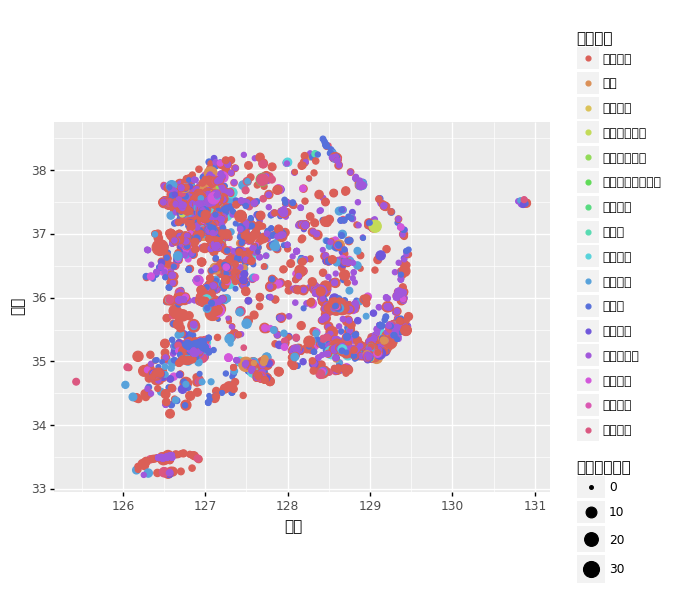

<ggplot: (702639397)>

In [41]:
# 전국적으로 어린이 공원이 가장 많은 것으로 보입니다.
# 제주도는 한라산 아래 해안선과 유사한 모습으로 공원이 배치되어 있는 모습이 인상적입니다.
(ggplot(park_loc_notnull)
 + aes(x='경도', y='위도', color='공원구분', size='공원면적비율')
 + geom_point()
 + theme(text=element_text(family='NanumBarunGothic'))
)

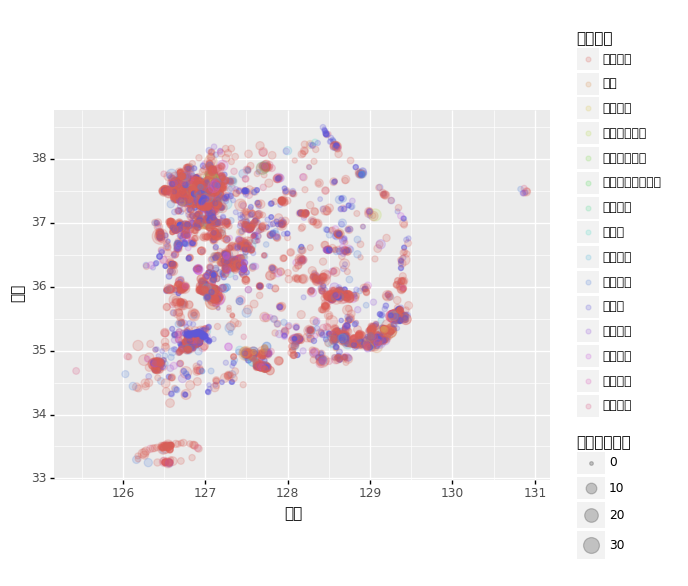

<ggplot: (701176754)>

In [42]:
# 어린이공원을 제외하고 찍어보도록 합니다.
# 다음으로 많은 근린공원과 소공원이 많이 보입니다.
(ggplot(park_loc_notnull.loc[park_loc_notnull['공원구분'] != '어린이공원'])
 + aes(x='경도', y='위도', color='공원구분', size='공원면적비율')
 + geom_point(alpha=0.2)
 + theme(text=element_text(family='NanumBarunGothic'))
)

In [43]:
park_do = pd.DataFrame(park['시도'].value_counts())

In [44]:
park_do

,시도
경기도,4074
서울특별시,1759
전라남도,1576
충청남도,1311
경상남도,1101
...,...
우이천로2길,1
중계로12길,1
중계로14라길,1
한글비석로39길,1


In [46]:
park_do_normalize = pd.DataFrame(park['시도'].value_counts(normalize=True))
park_do_normalize

,시도
경기도,0.225182
서울특별시,0.097225
전라남도,0.087110
충청남도,0.072463
경상남도,0.060856
...,...
우이천로2길,0.000055
중계로12길,0.000055
중계로14라길,0.000055
한글비석로39길,0.000055


In [48]:
park_sido = park_do.merge(park_do_normalize, left_index=True, right_index=True).reset_index()
park_sido

,index,시도_x,시도_y
0,경기도,4074,0.225182
1,서울특별시,1759,0.097225
2,전라남도,1576,0.087110
3,충청남도,1311,0.072463
4,경상남도,1101,0.060856
...,...,...,...
68,우이천로2길,1,0.000055
69,중계로12길,1,0.000055
70,중계로14라길,1,0.000055
71,한글비석로39길,1,0.000055


In [49]:
park_sido.columns = ['시도', '합계', '비율']
park_sido.columns

Index(['시도', '합계', '비율'], dtype='object')

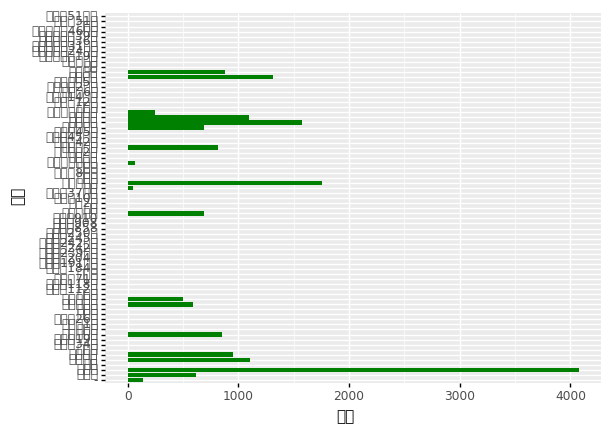

<ggplot: (705818637)>

In [50]:
# 경기도가 압도적으로 많음
(ggplot(park_sido.sort_values(by=['합계'], ascending=False))
 + aes(x='시도', y='합계')
 + geom_bar(stat='identity', position='dodge', fill='green')
 + coord_flip()
 + theme(text=element_text(family='NanumBarunGothic'))
)

In [51]:
park_type = park['공원구분'].value_counts().reset_index()
park_type.columns = ('공원구분', '합계')
park_type

,공원구분,합계
0,어린이공원,9587
1,근린공원,4205
2,소공원,2780
3,수변공원,361
4,문화공원,345
5,기타,258
6,체육공원,234
7,역사공원,185
8,마을마당,49
9,묘지공원,44
